# **Introduction: Exploring Apple Health Workout Data 📊**

## **Overview**
This notebook performs an **Exploratory Data Analysis (EDA)** of workout data exported from Apple Health. The goal is to uncover trends, patterns, and insights from metrics such as **distance, duration, heart rate, calories burned**, and other fitness-related statistics.

By analyzing this data, I aim to answer key questions about workout performance, health trends, and external influences such as technology or environment.

---

## **Key Questions**
The analysis is guided by the following questions:

1. **How does aging affect workouts?**
   - Analyze trends in **running speed**, **heart rate**, and **calories burned** over time.

2. **Are there differences in workout metrics based on the Apple Watch source version?**
   - Compare **distance, speed, and heart rate** across different `sourceVersion` values.

3. **Does a diverse workout routine improve health trends?**
   - Assess how the variety of workouts impacts overall fitness metrics like **calories burned** and **heart rate**.

4. **How does outside temperature affect running performance?**
   - Explore the relationship between **temperature** and **running speed** (will need to bring in temperature data).

5. **When was I most active based on StepCount?**
   - Identify periods of peak activity using **step count trends**.

6. **How does elevation impact running performance?**
   - Examine **route elevation data** to understand its influence on running pace and visualize routes on a map.

---

## **Data Source**
- The data was exported from the **Apple Health** app using the `export.xml` file.  
- Workout statistics include metrics such as:
   - **Distance** (mi/km)
   - **Duration** (minutes)
   - **Calories burned** (active and basal energy)
   - **Heart rate** (average, min, max) -- need to get this data for older apple watch version.
   - **Step count**
   - **Running power, ground contact time, and stride length**

- Route data (GPX) may be used for advanced mapping and elevation analysis.

---

## **Goals of This Notebook**
1. Clean and prepare the workout data for analysis.
2. Perform visualizations and statistical analysis to answer the outlined questions.
3. Highlight insights and trends that showcase fitness progress and influencing factors.

---

## **Output**
By the end of this notebook, we will:
- Visualize workout metrics and trends.
- Identify patterns based on time, source version, and workout diversity.
- Explore advanced route data and elevation mapping.



In [68]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
my_workouts = pd.read_csv('output/workout_summary.csv')

In [12]:
my_workouts.head()

,ActivityType,Duration (min),Source,Source_version,StartDate,EndDate,IndoorWorkout,ActiveEnergyBurned_sum_Cal,BasalEnergyBurned_sum_Cal,PausedDuration_mins,...,RunningVerticalOscillation_maximum_cm,RunningSpeed_average_mi/hr,RunningSpeed_minimum_mi/hr,RunningSpeed_maximum_mi/hr,RunningStrideLength_average_m,RunningStrideLength_minimum_m,RunningStrideLength_maximum_m,HeartRate_average_count/min,HeartRate_minimum_count/min,HeartRate_maximum_count/min
0,HighIntensityIntervalTraining,54.242769,Jason’s Apple Watch,5.3.3,2019-12-12 12:20:45-06:00,2019-12-12 13:15:00-06:00,0.0,461.313000,95.110000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HighIntensityIntervalTraining,52.620327,Jason’s Apple Watch,5.3.3,2019-12-16 11:49:35-06:00,2019-12-16 12:42:12-06:00,0.0,628.034000,92.232000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TraditionalStrengthTraining,50.564955,Jason’s Apple Watch,5.3.3,2019-12-17 11:52:57-06:00,2019-12-17 12:45:38-06:00,0.0,363.550000,88.375800,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Cycling,46.048452,Jason’s Apple Watch,5.3.3,2019-12-19 11:57:07-06:00,2019-12-19 12:43:10-06:00,1.0,569.988000,80.711700,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cycling,10.352728,Jason’s Apple Watch,6.1.1,2019-12-26 17:08:01-06:00,2019-12-26 17:18:23-06:00,0.0,0.041244,0.172624,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
my_workouts.describe()

,Duration (min),IndoorWorkout,ActiveEnergyBurned_sum_Cal,BasalEnergyBurned_sum_Cal,PausedDuration_mins,AverageMETs,DistanceCycling_sum_mi,DistanceWalkingRunning_sum_mi,DistanceSwimming_sum_yd,SwimmingStrokeCount_sum_count,...,RunningVerticalOscillation_maximum_cm,RunningSpeed_average_mi/hr,RunningSpeed_minimum_mi/hr,RunningSpeed_maximum_mi/hr,RunningStrideLength_average_m,RunningStrideLength_minimum_m,RunningStrideLength_maximum_m,HeartRate_average_count/min,HeartRate_minimum_count/min,HeartRate_maximum_count/min
count,699.000000,696.000000,697.000000,665.000000,699.000000,657.000000,4.000000e+00,311.000000,6.000000,6.000000,...,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,83.000000,83.000000,83.000000
mean,33.868744,0.208333,295.723560,54.525250,0.548941,7.982494,1.029251e-01,2.400590,833.333333,326.166667,...,10.823810,6.400204,4.534100,7.500130,1.031756,0.868571,1.166667,125.533888,96.096386,149.831325
std,54.603344,0.406408,138.356434,23.076810,2.650898,3.171258,1.131527e-01,0.841849,258.198890,96.636260,...,0.254764,0.264544,1.020154,0.488318,0.037542,0.064520,0.076376,30.371957,30.098057,28.515216
min,0.000000,0.000000,0.041244,0.129883,0.000000,1.300000,2.792940e-10,0.012913,500.000000,189.000000,...,10.300000,5.988980,2.378210,6.762470,0.979882,0.750000,1.060000,78.201600,58.000000,89.000000
25%,23.463122,0.000000,220.405000,39.745600,0.000000,4.872380,4.254510e-02,2.022160,625.000000,257.500000,...,10.600000,6.217330,3.732630,7.140570,0.999251,0.830000,1.120000,101.872000,76.000000,129.000000
50%,29.875018,0.000000,308.143000,49.828400,0.000000,9.640530,7.443960e-02,2.636780,1000.000000,385.000000,...,10.800000,6.414350,4.689940,7.433130,1.037390,0.870000,1.160000,115.301000,84.000000,154.000000
75%,42.039918,0.000000,351.186000,71.951000,0.020000,10.762400,1.348196e-01,3.010450,1000.000000,385.750000,...,11.000000,6.553160,5.300500,7.671370,1.055700,0.910000,1.200000,158.315000,106.000000,176.000000
max,1432.133333,1.000000,651.749000,208.195000,53.480000,12.843400,2.628210e-01,4.406260,1000.000000,397.000000,...,11.400000,7.105500,6.041670,8.947080,1.128460,0.980000,1.330000,184.194000,176.000000,195.000000


In [6]:
my_workouts.columns

Index(['ActivityType', 'Duration (min)', 'Source', 'Source_version',
       'StartDate', 'EndDate', 'IndoorWorkout', 'ActiveEnergyBurned_sum_Cal',
       'BasalEnergyBurned_sum_Cal', 'PausedDuration_mins', 'AverageMETs',
       'DistanceCycling_sum_mi', 'DistanceWalkingRunning_sum_mi',
       'DistanceSwimming_sum_yd', 'SwimmingStrokeCount_sum_count',
       'StepCount_sum_count', 'RunningGroundContactTime_average_ms',
       'RunningGroundContactTime_minimum_ms',
       'RunningGroundContactTime_maximum_ms', 'RunningPower_average_W',
       'RunningPower_minimum_W', 'RunningPower_maximum_W',
       'RunningVerticalOscillation_average_cm',
       'RunningVerticalOscillation_minimum_cm',
       'RunningVerticalOscillation_maximum_cm', 'RunningSpeed_average_mi/hr',
       'RunningSpeed_minimum_mi/hr', 'RunningSpeed_maximum_mi/hr',
       'RunningStrideLength_average_m', 'RunningStrideLength_minimum_m',
       'RunningStrideLength_maximum_m', 'HeartRate_average_count/min',
       'HeartRa

In [11]:
my_workouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 34 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ActivityType                           699 non-null    object 
 1   Duration (min)                         699 non-null    float64
 2   Source                                 699 non-null    object 
 3   Source_version                         699 non-null    object 
 4   StartDate                              699 non-null    object 
 5   EndDate                                699 non-null    object 
 6   IndoorWorkout                          696 non-null    float64
 7   ActiveEnergyBurned_sum_Cal             697 non-null    float64
 8   BasalEnergyBurned_sum_Cal              665 non-null    float64
 9   PausedDuration_mins                    699 non-null    float64
 10  AverageMETs                            657 non-null    float64
 11  Distan

### How does aging affect workout performance?

In [4]:
# first let's convert dates to datetime format
my_workouts['EndDate'] = pd.to_datetime(my_workouts['EndDate'])
my_workouts['StartDate'] = pd.to_datetime(my_workouts['StartDate'])


In [5]:
# Analyze trends in running speed, heart rate, and calories burned over time.
my_workouts['ActivityType'].unique()


array(['HighIntensityIntervalTraining', 'TraditionalStrengthTraining',
       'Cycling', 'Running', 'Walking', 'Hiking', 'Other', 'Swimming',
       'Yoga', 'StairClimbing', 'FunctionalStrengthTraining'],
      dtype=object)

In [28]:
running_workouts = my_workouts.query('ActivityType == "Running"')

In [11]:
running_workouts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260 entries, 7 to 696
Data columns (total 34 columns):
 #   Column                                 Non-Null Count  Dtype                    
---  ------                                 --------------  -----                    
 0   ActivityType                           260 non-null    object                   
 1   Duration (min)                         260 non-null    float64                  
 2   Source                                 260 non-null    object                   
 3   Source_version                         260 non-null    object                   
 4   StartDate                              260 non-null    datetime64[ns, UTC-06:00]
 5   EndDate                                260 non-null    datetime64[ns, UTC-06:00]
 6   IndoorWorkout                          260 non-null    float64                  
 7   ActiveEnergyBurned_sum_Cal             260 non-null    float64                  
 8   BasalEnergyBurned_sum_Cal          

In [29]:
running_workouts = running_workouts.copy()
running_workouts['rate_mins_mile']=(running_workouts['Duration (min)'] - running_workouts['PausedDuration_mins'])/running_workouts['DistanceWalkingRunning_sum_mi']

In [31]:
running_workouts.head()

,ActivityType,Duration (min),Source,Source_version,StartDate,EndDate,IndoorWorkout,ActiveEnergyBurned_sum_Cal,BasalEnergyBurned_sum_Cal,PausedDuration_mins,...,RunningSpeed_average_mi/hr,RunningSpeed_minimum_mi/hr,RunningSpeed_maximum_mi/hr,RunningStrideLength_average_m,RunningStrideLength_minimum_m,RunningStrideLength_maximum_m,HeartRate_average_count/min,HeartRate_minimum_count/min,HeartRate_maximum_count/min,rate_mins_mile
7,Running,17.124256,Jason’s Apple Watch,6.1.1,2020-01-07 11:52:25-06:00,2020-01-07 12:10:21-06:00,0.0,230.420,28.9791,0.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.060593
12,Running,25.349215,Jason’s Apple Watch,6.1.1,2020-01-15 11:55:43-06:00,2020-01-15 12:22:48-06:00,0.0,338.962,43.3554,1.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.826352
30,Running,24.106075,Jason’s Apple Watch,6.1.3,2020-02-25 11:54:17-06:00,2020-02-25 12:19:46-06:00,0.0,336.003,41.3429,1.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.524893
33,Running,24.342105,Jason’s Apple Watch,6.1.3,2020-03-02 12:01:16-06:00,2020-03-02 12:26:59-06:00,0.0,338.341,41.6994,1.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.535382
37,Running,23.979940,Jason’s Apple Watch,6.1.3,2020-03-12 10:55:59-06:00,2020-03-12 11:22:04-06:00,0.0,342.384,41.7795,2.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.237964


In [32]:
cols_of_interest = ['Duration (min)','PausedDuration_mins','rate_mins_mile', 'StartDate', 'EndDate','DistanceWalkingRunning_sum_mi']

In [37]:
# Let's normalize time to 0 each calendar year to calculate days
# Step 1: Group by year and find the minimum date for each year
running_workouts['year'] = running_workouts['StartDate'].dt.year
min_dates = running_workouts.groupby('year')['StartDate'].transform('min')

# Step 2: Calculate the difference in days from the start of each year
running_workouts['running_days'] = (running_workouts['StartDate'] - min_dates).dt.days

# Step 3: Round the producing_days to the nearest 30-day increment
running_workouts['running_days_round'] = (running_workouts['running_days'] / 30).round() * 30

In [38]:
running_workouts.head()

,ActivityType,Duration (min),Source,Source_version,StartDate,EndDate,IndoorWorkout,ActiveEnergyBurned_sum_Cal,BasalEnergyBurned_sum_Cal,PausedDuration_mins,...,RunningStrideLength_average_m,RunningStrideLength_minimum_m,RunningStrideLength_maximum_m,HeartRate_average_count/min,HeartRate_minimum_count/min,HeartRate_maximum_count/min,rate_mins_mile,year,running_days,running_days_round
7,Running,17.124256,Jason’s Apple Watch,6.1.1,2020-01-07 11:52:25-06:00,2020-01-07 12:10:21-06:00,0.0,230.420,28.9791,0.85,...,NaN,NaN,NaN,NaN,NaN,NaN,8.060593,2020,0,0.0
12,Running,25.349215,Jason’s Apple Watch,6.1.1,2020-01-15 11:55:43-06:00,2020-01-15 12:22:48-06:00,0.0,338.962,43.3554,1.78,...,NaN,NaN,NaN,NaN,NaN,NaN,7.826352,2020,8,0.0
30,Running,24.106075,Jason’s Apple Watch,6.1.3,2020-02-25 11:54:17-06:00,2020-02-25 12:19:46-06:00,0.0,336.003,41.3429,1.48,...,NaN,NaN,NaN,NaN,NaN,NaN,7.524893,2020,49,60.0
33,Running,24.342105,Jason’s Apple Watch,6.1.3,2020-03-02 12:01:16-06:00,2020-03-02 12:26:59-06:00,0.0,338.341,41.6994,1.42,...,NaN,NaN,NaN,NaN,NaN,NaN,7.535382,2020,55,60.0
37,Running,23.979940,Jason’s Apple Watch,6.1.3,2020-03-12 10:55:59-06:00,2020-03-12 11:22:04-06:00,0.0,342.384,41.7795,2.17,...,NaN,NaN,NaN,NaN,NaN,NaN,7.237964,2020,64,60.0


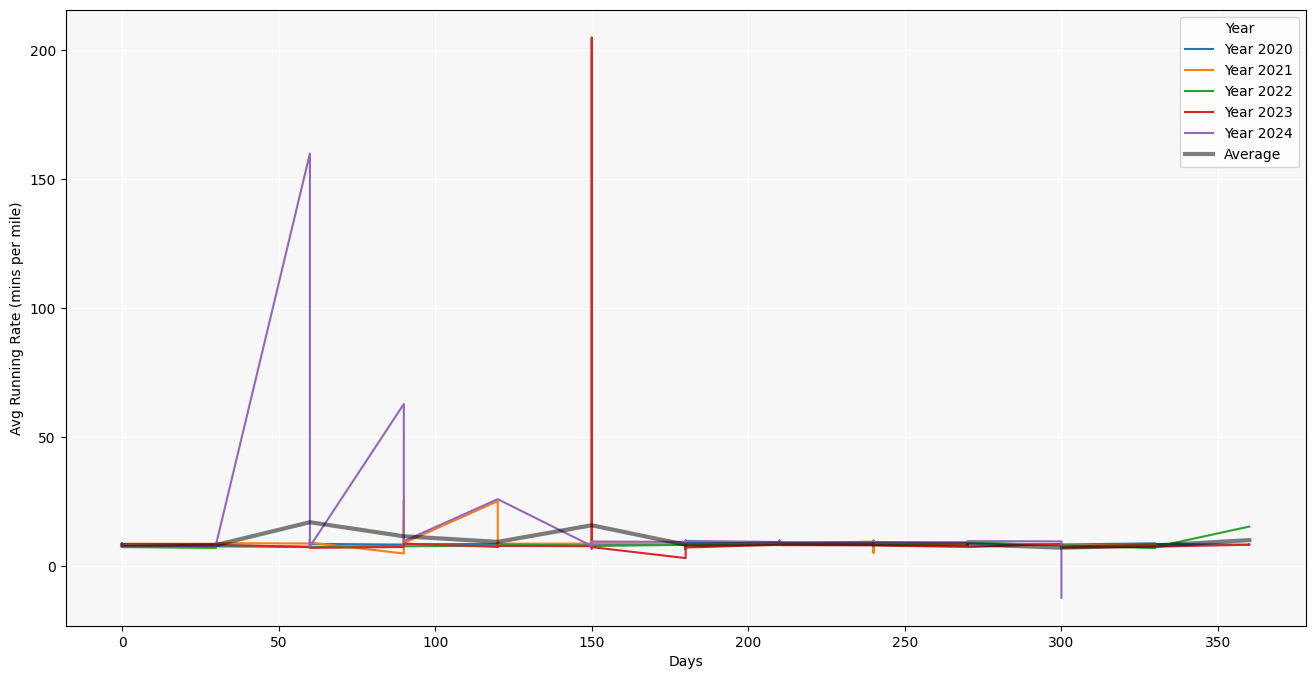

In [49]:
# let's plot rate over time
# Plotting
# Define the colormap
colormap =plt.colormaps['tab10'] 

fig = plt.figure(figsize=[16, 8])
ax = fig.add_subplot(1, 1, 1)

# Group by year and assign colors
for i, (year, chunk) in enumerate(running_workouts.groupby('year')):
    ax.plot(
        chunk['running_days_round'], 
        chunk['rate_mins_mile'], 
        label=f"Year {year}",  # Add label for legend
        color=colormap(i)     # Use colormap for color
    )

# Add average line (proxy for type curve)
ax.plot(
    running_workouts.groupby('running_days_round')['rate_mins_mile'].mean(),
    alpha=0.5,
    color='black',
    linewidth=3,
    label='Average'
)

# Customize plot
ax.set_facecolor((0.97, 0.97, 0.97))
ax.set_ylabel('Avg Running Rate (mins per mile)')
ax.set_xlabel('Days')
ax.grid(color='w')
ax.legend(title="Year", loc='best')  # Add legend

# Show plot
plt.show()

In [52]:
# have some outliers in the data that is skewing results.  Need to handle those
# Let's correct them by replacing them with the median
def correct_outliers_by_year(group):
    Q1 = group['rate_mins_mile'].quantile(0.25)
    Q3 = group['rate_mins_mile'].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace outliers with med
    med_rate = group['rate_mins_mile'].median()
    group['rate_mins_mile_corrected'] = group['rate_mins_mile'].apply(
        lambda x: med_rate if x < lower_bound or x > upper_bound else x
    )
    return group


In [53]:
corrected_workouts = running_workouts.groupby('year').apply(correct_outliers_by_year).reset_index(drop=True)


C:\Users\alley\AppData\Local\Temp\ipykernel_29104\2639632703.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corrected_workouts = running_workouts.groupby('year').apply(correct_outliers_by_year).reset_index(drop=True)


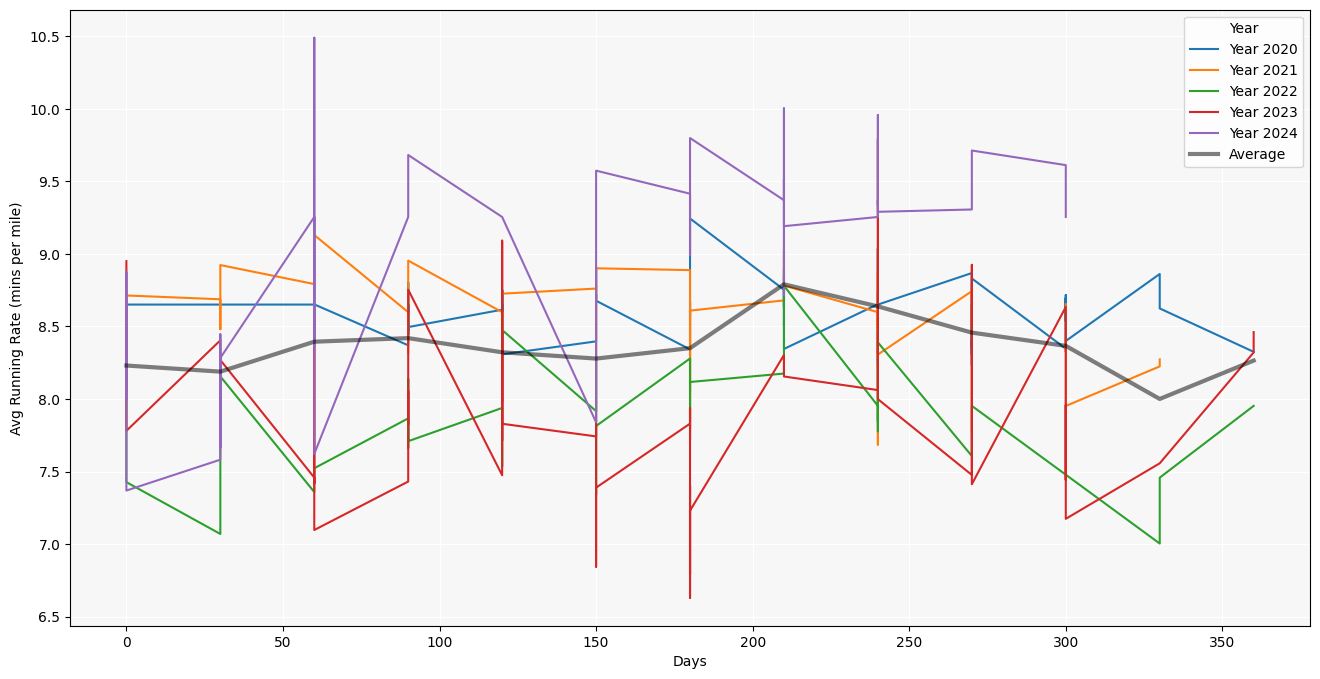

In [56]:
# Plotting correct workouts
# Define the colormap
colormap =plt.colormaps['tab10'] 

fig = plt.figure(figsize=[16, 8])
ax = fig.add_subplot(1, 1, 1)

# Group by year and assign colors
for i, (year, chunk) in enumerate(corrected_workouts.groupby('year')):
    ax.plot(
        chunk['running_days_round'], 
        chunk['rate_mins_mile_corrected'], 
        label=f"Year {year}",  # Add label for legend
        color=colormap(i)     # Use colormap for color
    )

# Add average line (proxy for type curve)
ax.plot(
    corrected_workouts.groupby('running_days_round')['rate_mins_mile_corrected'].mean(),
    alpha=0.5,
    color='black',
    linewidth=3,
    label='Average'
)

# Customize plot
ax.set_facecolor((0.97, 0.97, 0.97))
ax.set_ylabel('Avg Running Rate (mins per mile)')
ax.set_xlabel('Days')
ax.grid(color='w')
ax.legend(title="Year", loc='best')  # Add legend

# Show plot
plt.show()

In [57]:
# Let's apply a rolling mean to smooth out the data 
corrected_workouts['rate_mins_mile_smooth'] = corrected_workouts.groupby('year')['rate_mins_mile_corrected'].transform(
    lambda x: x.rolling(window=5, min_periods=1).mean()
)

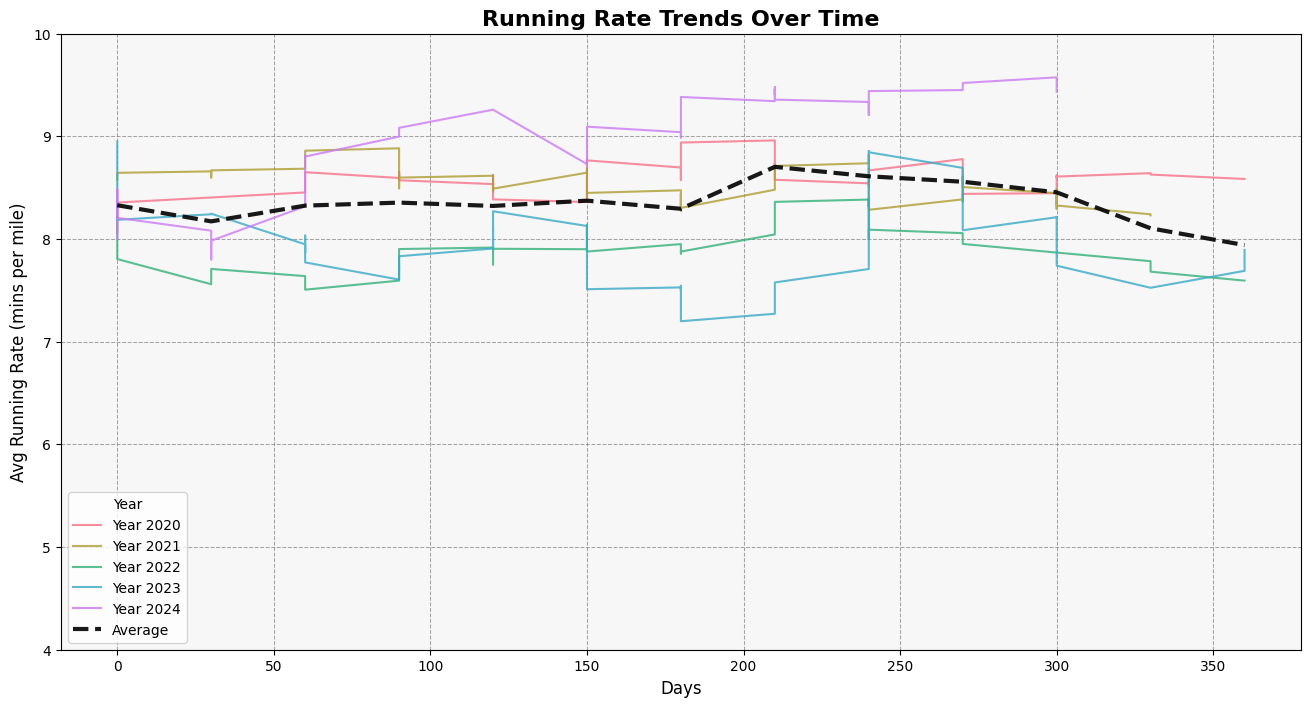

In [67]:
# Set up color palette
colors = sns.color_palette("husl", len(corrected_workouts['year'].unique()))

# Plotting
fig = plt.figure(figsize=[16, 8])
ax = fig.add_subplot(1, 1, 1)

# Group by year and assign colors
for i, (year, chunk) in enumerate(corrected_workouts.groupby('year')):
    ax.plot(
        chunk['running_days_round'], 
        chunk['rate_mins_mile_smooth'], 
        label=f"Year {year}",
        color=colors[i],
        linewidth=1.5,
        alpha=0.8
    )

# Add smoothed average line
ax.plot(
    corrected_workouts.groupby('running_days_round')['rate_mins_mile_smooth'].mean(),
    alpha=0.9,
    color='black',
    linewidth=3,
    linestyle='--',
    label='Average'
)

# Customize plot
ax.set_facecolor((0.97, 0.97, 0.97))
ax.grid(color='gray', linestyle='--', linewidth=0.75, alpha=0.7)
ax.set_ylabel('Avg Running Rate (mins per mile)', fontsize=12)
ax.set_xlabel('Days', fontsize=12)

ax.set_ylim(4,10)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_title('Running Rate Trends Over Time', fontsize=16, fontweight='bold')
ax.legend(title="Year", loc='best', fontsize=10)

# Show plot
plt.show()

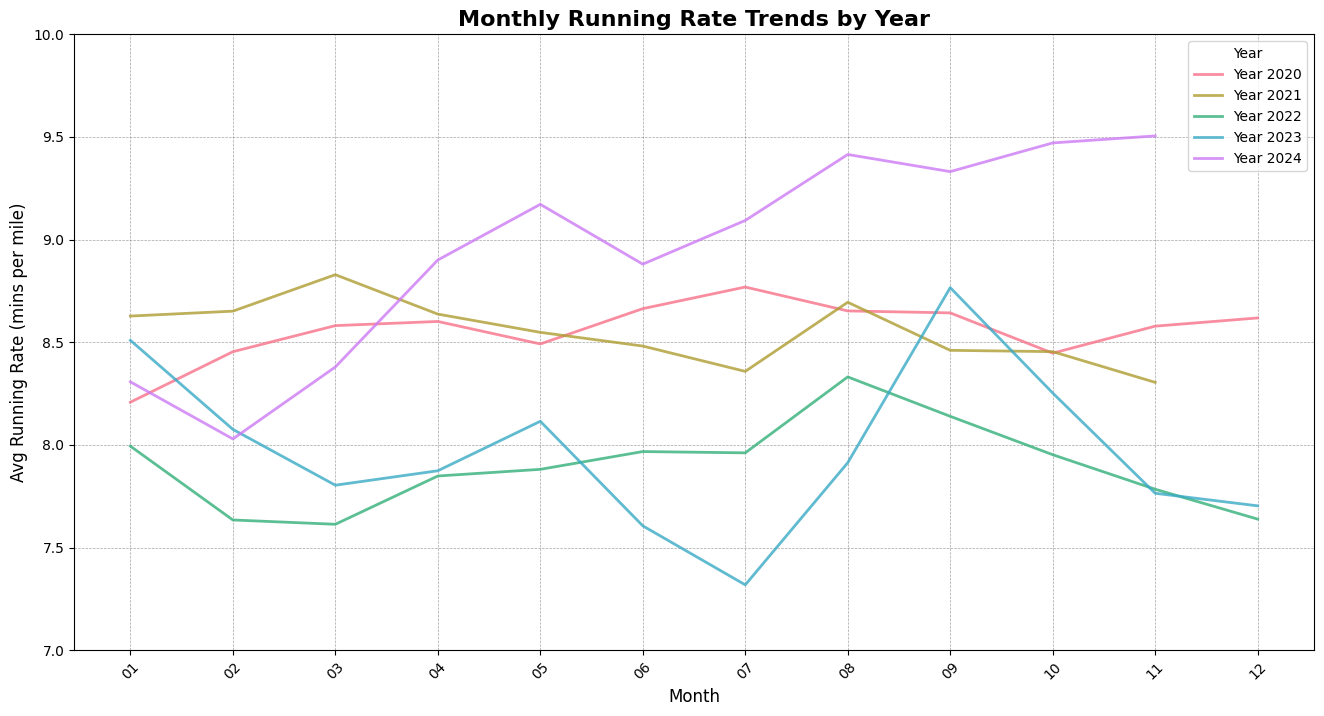

In [83]:
# Extract month/day for plotting
corrected_workouts['MonthDay'] = corrected_workouts['StartDate'].dt.strftime('%m')

# Group by Month/Day and calculate the mean across all years
monthly_avg = corrected_workouts.groupby(['year','MonthDay'])['rate_mins_mile_smooth'].mean()

# Plotting
fig, ax = plt.subplots(figsize=(16, 8))

# Set up a color palette for each year
years = monthly_avg.index.get_level_values('year').unique()
colors = sns.color_palette("husl", len(years))

# Plot each year as a line
for i, year in enumerate(years):
    year_data = monthly_avg.loc[year]
    ax.plot(
        year_data.index,          # MonthDay values (x-axis)
        year_data.values,         # Running rate averages (y-axis)
        label=f"Year {year}",     # Label for legend
        color=colors[i],          # Assign unique color
        linewidth=2, 
        alpha=0.8
    )

# Customize the plot
ax.set_title("Monthly Running Rate Trends by Year", fontsize=16, fontweight='bold')
ax.set_ylabel("Avg Running Rate (mins per mile)", fontsize=12)
ax.set_xlabel("Month", fontsize=12)
ax.set_xticks(monthly_avg.index.get_level_values('MonthDay').unique())
ax.set_xticklabels(
    monthly_avg.index.get_level_values('MonthDay').unique(), 
    rotation=45, 
    fontsize=10
)
ax.set_ylim(7, 10)  # Adjust y-axis limits for better visualization
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
ax.legend(title="Year", fontsize=10)

# Show the plot
plt.show()

# **Interpretation of Running Rate Trends**

## **Observations**
1. **Overall Trend (Average Line):**
   - The black dashed line shows a relatively stable running pace (minutes per mile) throughout the year.
   - There’s a slight increase in pace (slower runs) in the middle of the year (~days 150–200) and a small improvement (faster runs) toward the end of the year.

2. **Yearly Variations:**
   - **2020 and 2021**:
     - These years appear relatively stable, with fewer fluctuations compared to others.
     - The pace is mostly close to the average trend, suggesting consistent performance.
   - **2022**:
     - Starts off at a good pace and then increases significantly during summer months.
     - This suggests possible inconsistencies in workout routines, external conditions, or outlier runs (e.g., very slow or very fast workouts).
   - **2023**:
     - High variability in rate, I want to look closer at this data to make sure I have enough data points.
     - Large change between July to September.
   - **2024**:
     - Larger fluctuations, especially early and mid-year, suggesting inconsistent performance.
     - Pace is struggling compared to other years.  Couple things to note: Upgraded Apple watch and changed running locations.

3. **Consistency:**
   - Some years (e.g., 2023, 2024) show a lot of variation, with inconsistent performance.
   - Other years (e.g., 2020, 2021) are more stable, with smoother trends and fewer extreme changes.

---

## **Potential Explanations**
1. **Seasonality**:
   - The mid-year dips in pace could correlate with hotter weather or changes in conditions like humidity, which may affect running performance.
   - Improvements at the end of the year might reflect cooler weather or more training consistency.

2. **Training or Lifestyle Changes**:
   - Years with more fluctuations (2023, 2024) might reflect inconsistent training or external factors like injury, fatigue, or reduced motivation.

3. **Data Inconsistencies**:
   - Sudden spikes or drops may be due to outlier workouts, GPS inaccuracies, or errors in data collection.

---

## **Insights for Improvement**
1. **Focus on Consistency**:
   - Years with stable trends (e.g., 2020, 2021) could be used as benchmarks for setting future goals.
   - Avoid large fluctuations (like in 2022 and 2024) by maintaining a more consistent workout schedule.

2. **Analyze External Factors**:
   - Explore correlations with factors like weather (temperature, humidity), workout routes (elevation changes), or training plans to understand reasons for variability.

3. **Leverage Advanced Metrics**:
   - Include additional metrics like heart rate or stride length to gain deeper insights into the factors influencing performance.
